<a href="https://colab.research.google.com/github/m3nkam/ml-covid19/blob/main/pfe_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importation des librairies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Importation du Dataset
url = 'https://raw.githubusercontent.com/m3nkam/ml-covid19/main/datasetcovid19.csv'
data = pd.read_csv(url, index_col=0, encoding = "UTF8")
#Effectuons une copie de nos données 
df_raw = data.copy()
df_raw.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration�(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time�(PTT)�,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase�(CPK)�,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#Déterminons le nombre de lignes et le nombre de colonnes
df_raw.shape

(5644, 110)

In [24]:
#Déterminons et dénombrons les types de variables présent dans le dataset
df_raw.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

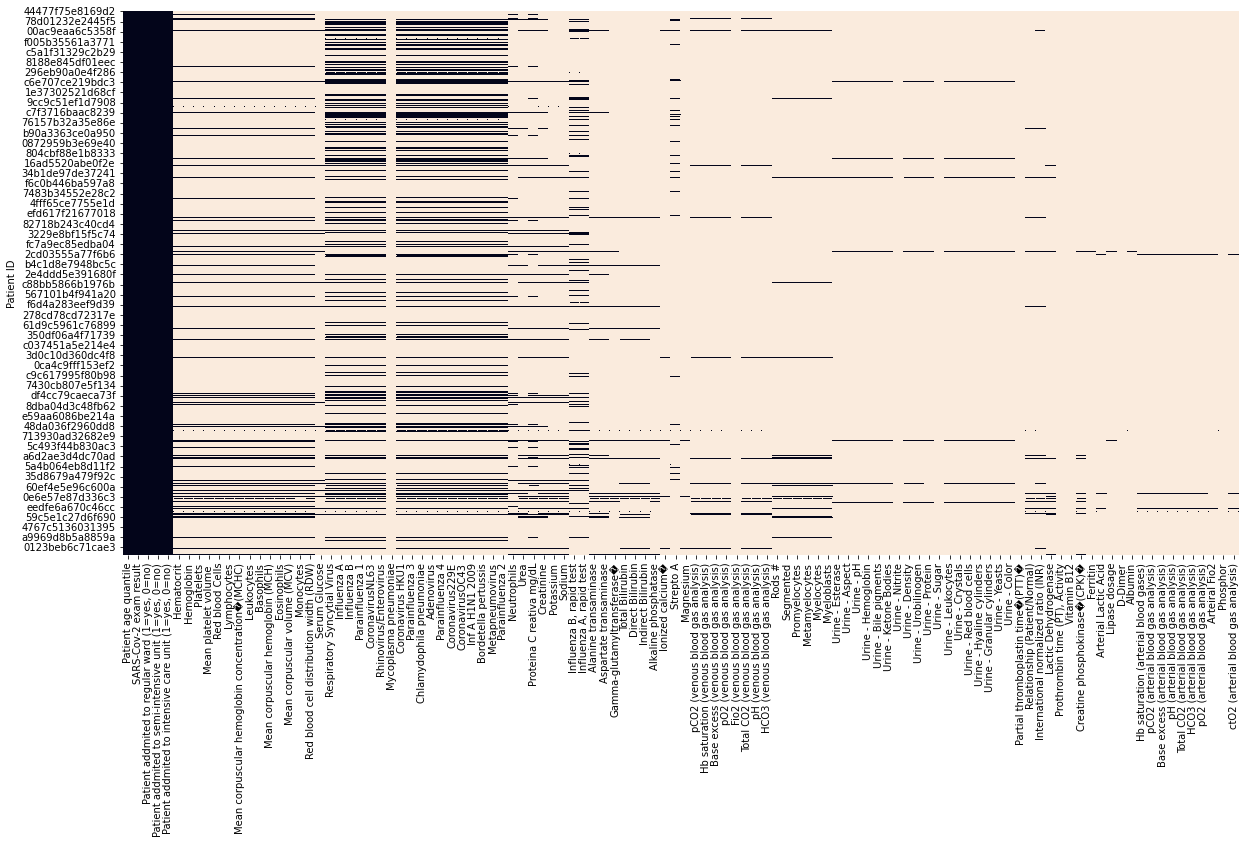

In [25]:
#Visualisons toutes nos données dans une image
plt.figure(figsize = (20,10))
sns.heatmap(df_raw.isna(),cbar=False)

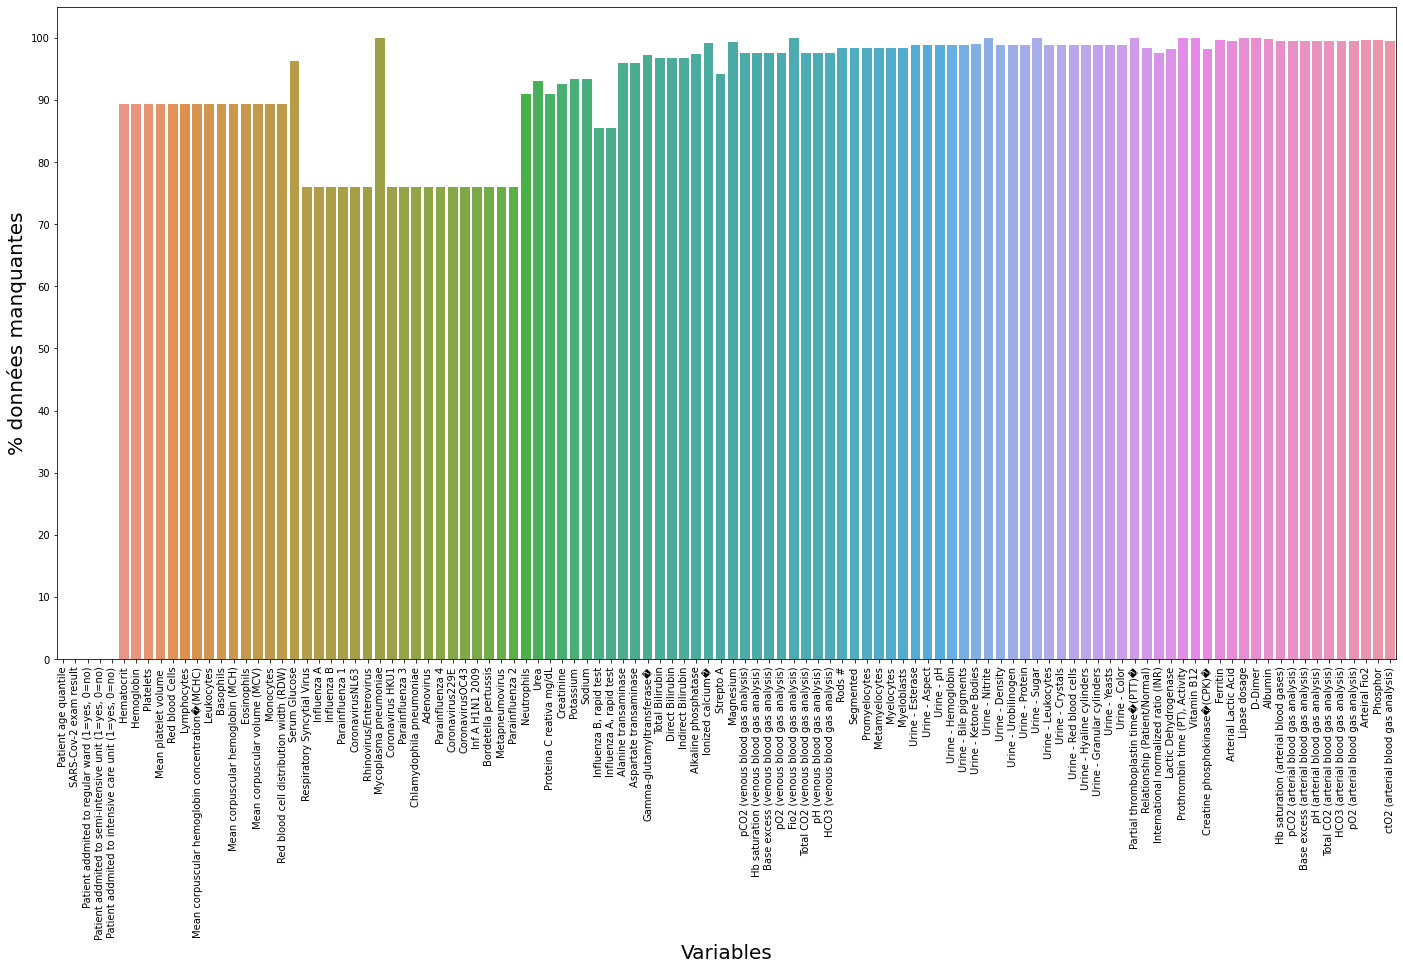

In [26]:
# How many nan have each column
nan_per_column = pd.DataFrame(df_raw.isna().sum(),columns=['nanValues']).reset_index()

# Calculate NaN % for each feature
for i in range(0,len(nan_per_column)):
    nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(df_raw),3)

# Plot - % of missing rows for each column
plt.figure(figsize=(24,12))
sns.barplot(x="index", y="nanValuesPct", data=nan_per_column)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('% données manquantes', fontsize=20)
#plt.title('Missing Data Plot', fontsize=30)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=90);

**Elimination des variables dont le taux de données manquantes est > %90**

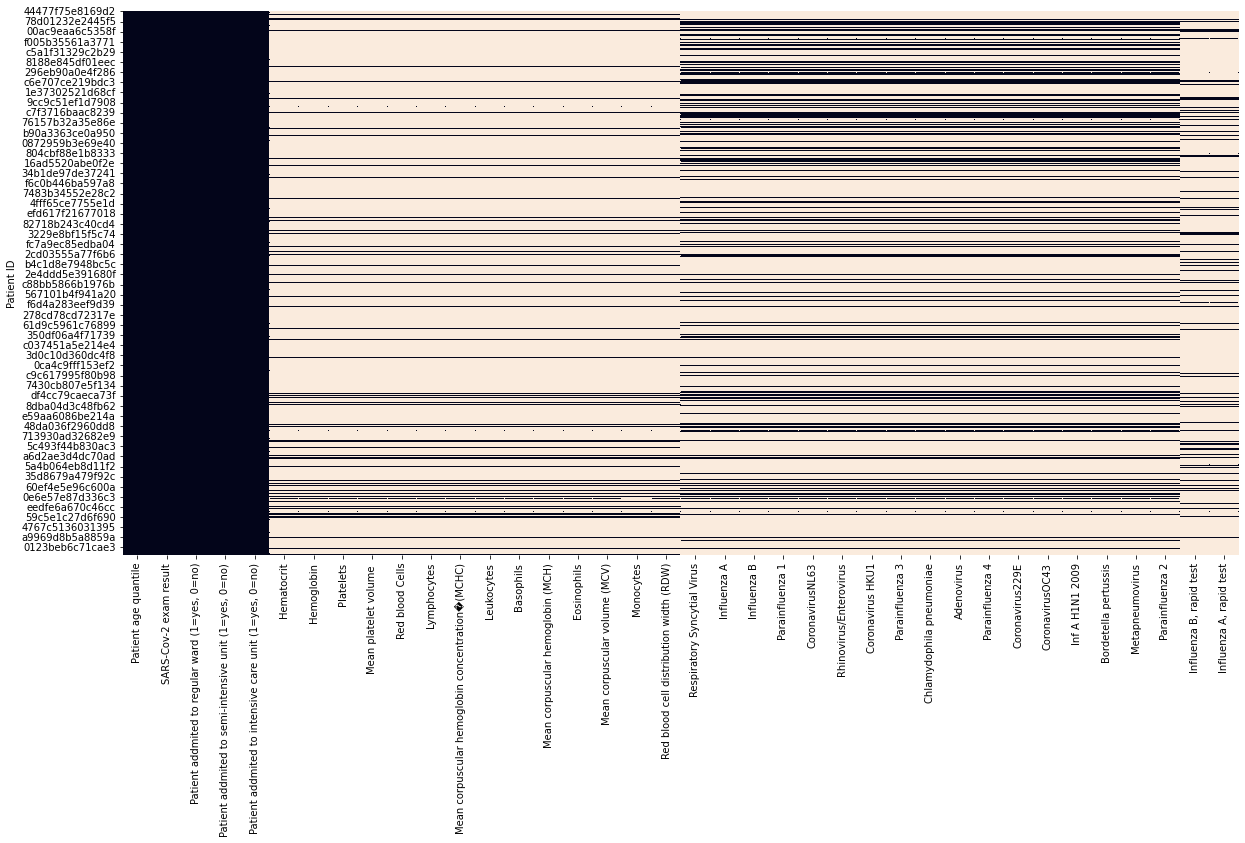

In [27]:
#Elimininons les colonnes qui ont plus de 90% de données manquantes >
df = df_raw[df_raw.columns[df_raw.isna().sum()/df_raw.shape[0]<0.9]]
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(),cbar=False)

**ANALYSE DE LA VARIABLE CIBLE**

In [28]:
#Visualisons la target
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

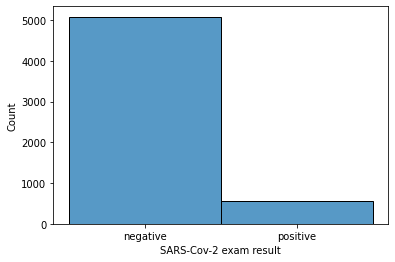

In [29]:
sns.histplot(df['SARS-Cov-2 exam result'])

In [30]:
#Créons des sous-ensembles positif et négatif de la variable cible
positive_target=df[df['SARS-Cov-2 exam result']=='positive']

negative_target=df[df['SARS-Cov-2 exam result']=='negative']

**Analyse des variables numériques**

In [31]:
# Selectionnons toutes les colonnes de type float
num_columns = df.select_dtypes(include = ['float'])
for col in  num_columns:
    print(col)


Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration�(MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)


**Relation entre la variable cible et les variables numériques**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

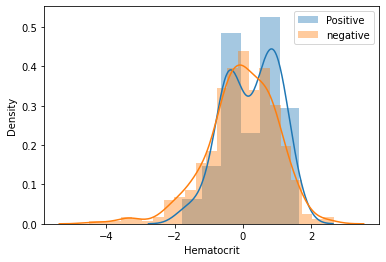

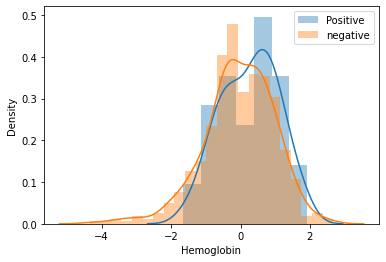

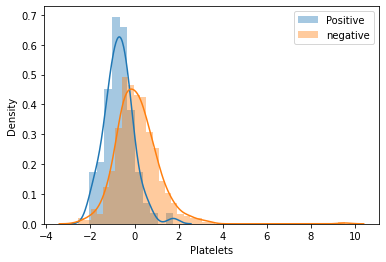

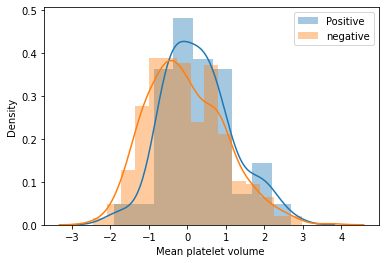

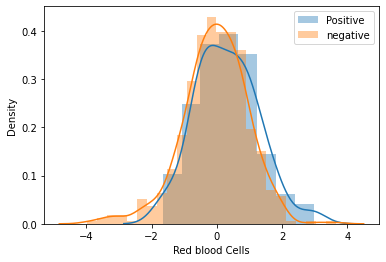

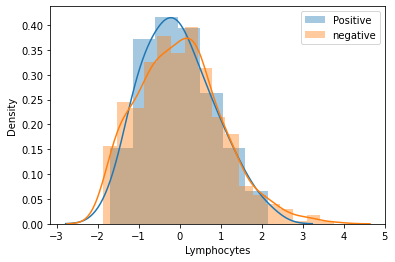

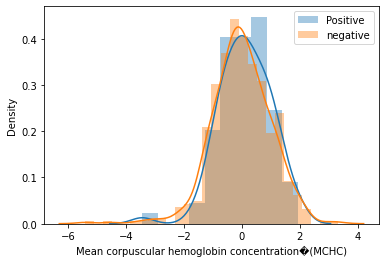

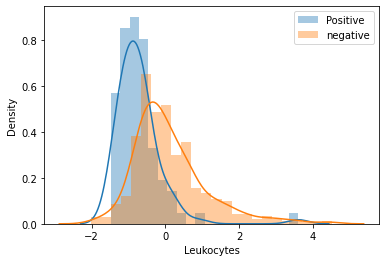

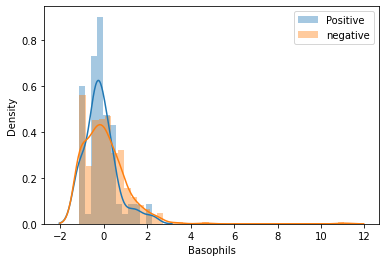

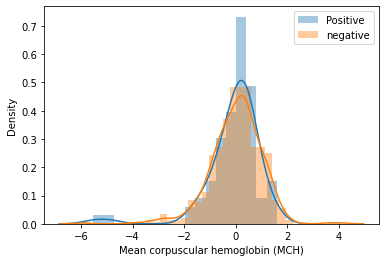

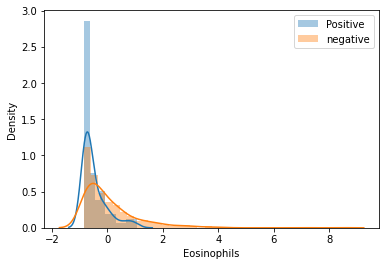

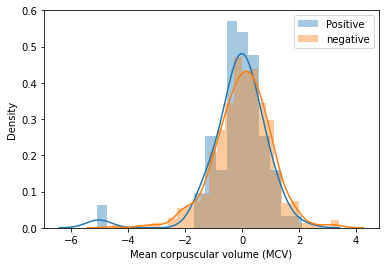

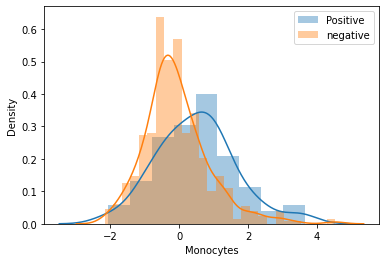

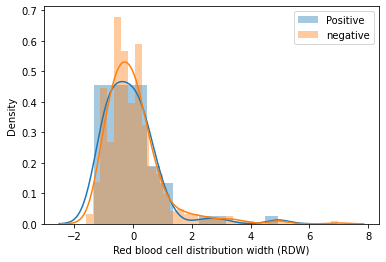

In [32]:
#Visualisons la relation entre la variable cible et les variables numériques
for col in num_columns:
    plt.figure()
    sns.distplot(positive_target[col], label='Positive')
    sns.distplot(negative_target[col], label='negative')
    plt.legend()

**Relation entre la variable cible et Age quantile**

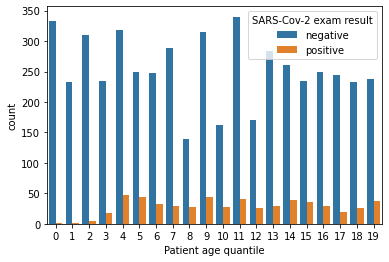

In [33]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data = df)

**Analyse des variables catégorielles**

In [34]:
# Selectionnons toutes les colonnes de type float
cat_columns = df.select_dtypes(include = ['object'])
for col in  cat_columns:
    print(col)

SARS-Cov-2 exam result
Respiratory Syncytial Virus
Influenza A
Influenza B
Parainfluenza 1
CoronavirusNL63
Rhinovirus/Enterovirus
Coronavirus HKU1
Parainfluenza 3
Chlamydophila pneumoniae
Adenovirus
Parainfluenza 4
Coronavirus229E
CoronavirusOC43
Inf A H1N1 2009
Bordetella pertussis
Metapneumovirus
Parainfluenza 2
Influenza B, rapid test
Influenza A, rapid test


In [35]:
# Eliminons également les colonnes rapid test
rapidtest_columns = ['Influenza A, rapid test', 'Influenza B, rapid test']
cat_columns.drop(rapidtest_columns,1, inplace=True)
#Eliminons les colonnes relatifs à l'admission du patient dans un service adéquant
#cat_columns.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1,inplace=True)
# Drop target variable
#df.drop('SARS-Cov-2 exam result', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Encodage des variables catégorielles**

In [45]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df
cat_columns=encodage(cat_columns)
# Verify if new columns are statical features
cat_vars = list()
for j in cat_columns.columns:
    if len(df[j].unique()) <= 5:
        print(j, ' - ', df[j].unique())
        cat_vars.append(j)
print('This dataset have now',len(cat_vars), ' discrete variables of ',len(df),'\n')

SARS-Cov-2 exam result  -  ['negative' 'positive']
Chlamydophila pneumoniae  -  [nan 'not_detected' 'detected']
Bordetella pertussis  -  [nan 'not_detected' 'detected']
detection_paramyxoviridae  -  [0 'not_detectednot_detectednot_detectednot_detected'
 'not_detectednot_detecteddetectednot_detected'
 'not_detecteddetectednot_detectednot_detected'
 'not_detectednot_detectednot_detecteddetected']
detection_picornaviridae   -  [0 'detected' 'not_detected']
detection_pneumoviridae  -  [0.]
detection_orthomyxoviridae  -  [0.]
detection_adenoviridae  -  [0 'not_detected' 'detected']
This dataset have now 8  discrete variables of  5644 



**Regroupement des variables catégorielles par famille**

In [37]:
# Defining lists for each family column
detection_adenoviridae = ['Adenovirus']
detection_coronaviridae = ['CoronavirusOC43', 'Coronavirus HKU1', 'CoronavirusNL63', 'Coronavirus229E']
detection_orthomyxoviridae = ['Influenza A', 'Influenza B', 'Inf A H1N1 2009'] 
detection_paramyxoviridae = ['Parainfluenza 2','Parainfluenza 3', 'Parainfluenza 4', 'Parainfluenza 1']
detection_picornaviridae = ['Rhinovirus/Enterovirus']
detection_pneumoviridae = ['Respiratory Syncytial Virus', 'Metapneumovirus']
groups_list = [detection_adenoviridae, detection_coronaviridae, detection_orthomyxoviridae, detection_paramyxoviridae, detection_picornaviridae, detection_pneumoviridae]
groups_cols = ['detection_adenoviridae', 'detection_coronaviridae', 'detection_orthomyxoviridae', 'detection_paramyxoviridae', 'detection_picornaviridae', 'detection_pneumoviridae']


cat_columns['detection_coronaviridae'] = cat_columns[detection_coronaviridae].sum(axis=1) 
cat_columns = cat_columns.drop(detection_coronaviridae, axis=1)

cat_columns['detection_paramyxoviridae'] = cat_columns[detection_paramyxoviridae].sum(axis=1) 
cat_columns = cat_columns.drop(detection_paramyxoviridae, axis=1)

cat_columns['detection_picornaviridae '] = cat_columns[detection_picornaviridae ].sum(axis=1) 
cat_columns = cat_columns.drop(detection_picornaviridae , axis=1)

cat_columns['detection_pneumoviridae'] = cat_columns[detection_pneumoviridae].sum(axis=1) 
cat_columns = cat_columns.drop(detection_pneumoviridae , axis=1)

cat_columns['detection_orthomyxoviridae'] = cat_columns[detection_orthomyxoviridae].sum(axis=1) 
cat_columns = cat_columns.drop(detection_orthomyxoviridae , axis=1)

cat_columns['detection_adenoviridae'] = cat_columns[detection_adenoviridae].sum(axis=1) 
cat_columns = cat_columns.drop(detection_adenoviridae , axis=1)
cat_columns.columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Index(['SARS-Cov-2 exam result', 'Chlamydophila pneumoniae',
       'Bordetella pertussis', 'detection_coronaviridae',
       'detection_paramyxoviridae', 'detection_picornaviridae ',
       'detection_pneumoviridae', 'detection_orthomyxoviridae',
       'detection_adenoviridae'],
      dtype='object')

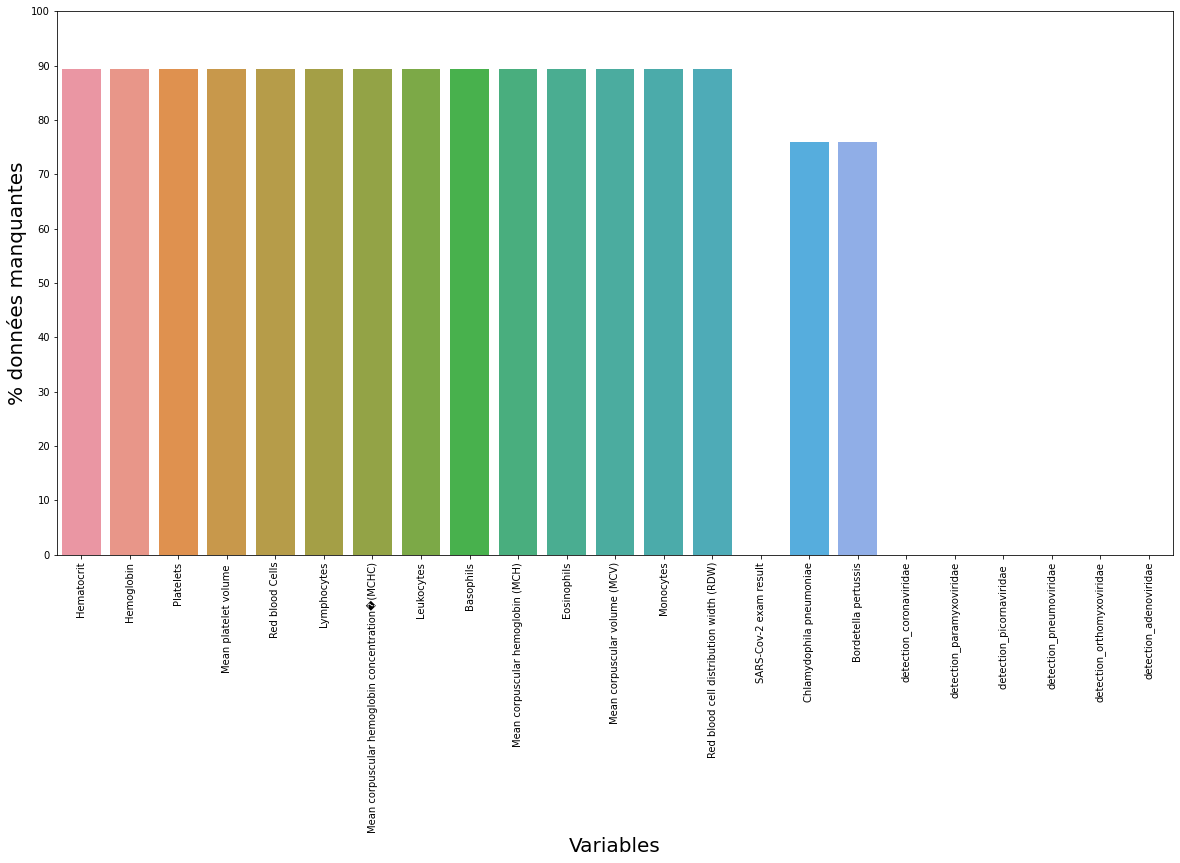

In [39]:
df =pd.concat([num_columns, cat_columns], axis=1)
# How many nan have each column
nan_per_column = pd.DataFrame(df.isna().sum(),columns=['nanValues']).reset_index()

# Calculate NaN % for each feature
for i in range(0,len(nan_per_column)):
    nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(df),3)

# Plot - % of missing rows for each column
plt.figure(figsize=(20,10))
sns.barplot(x="index", y="nanValuesPct", data=nan_per_column)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('% données manquantes', fontsize=20)
#plt.title('Missing Data Plot', fontsize=30)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=90);

IndexError: ignored

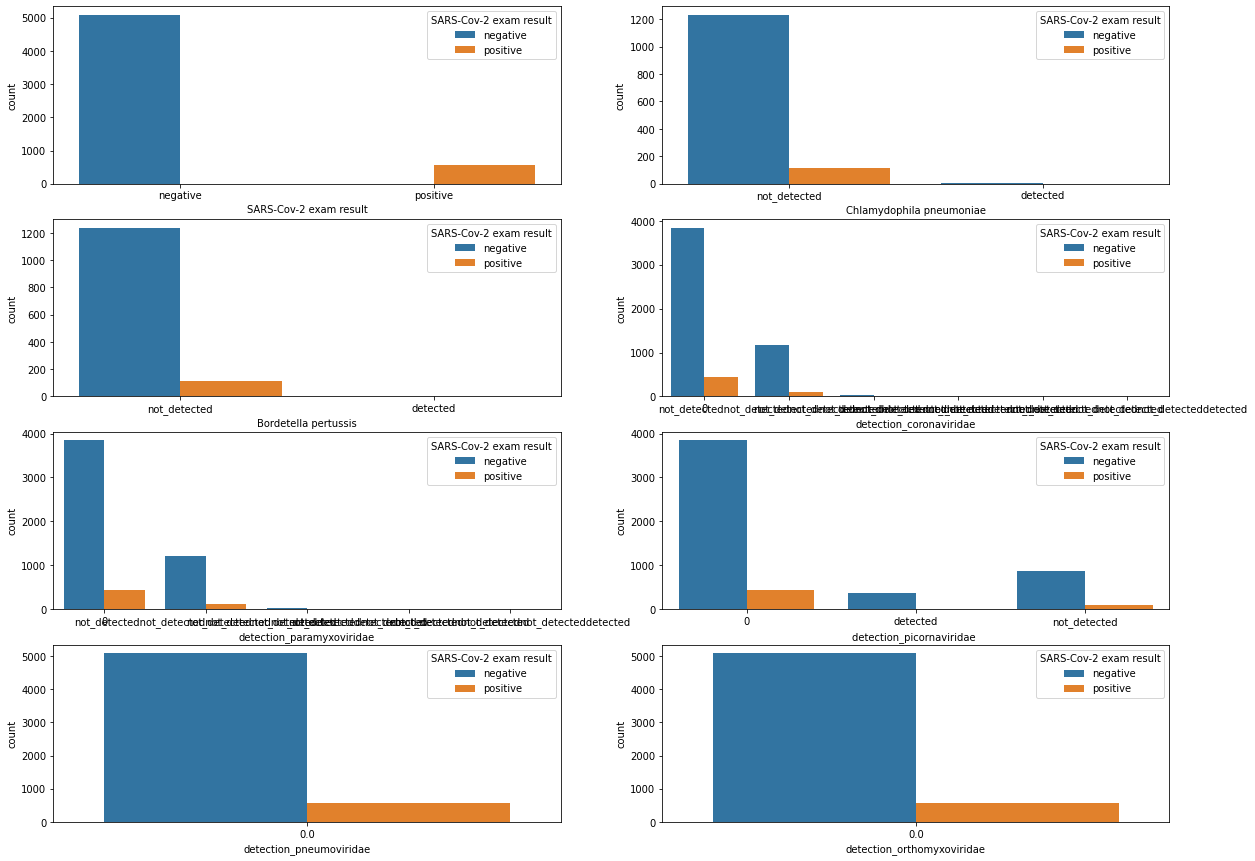

In [41]:
# PLOT - Barplots over our variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,15))
r = 0 # Index row
c = 0 # Index col
for f in cat_columns:
    # Count Plot
    sns.countplot(x=f, hue='SARS-Cov-2 exam result', data=df,ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='SARS-Cov-2 exam result', loc='upper right')
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1

plt.tight_layout()

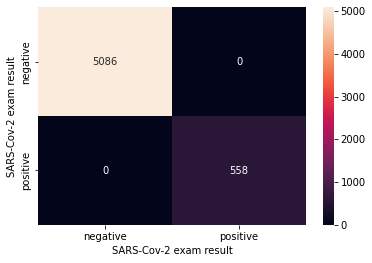

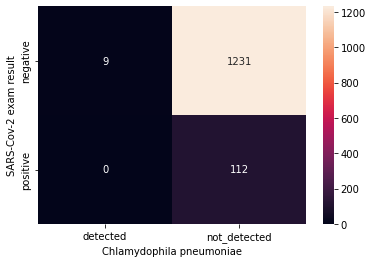

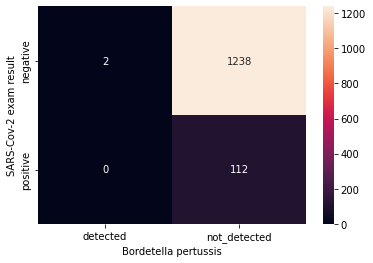

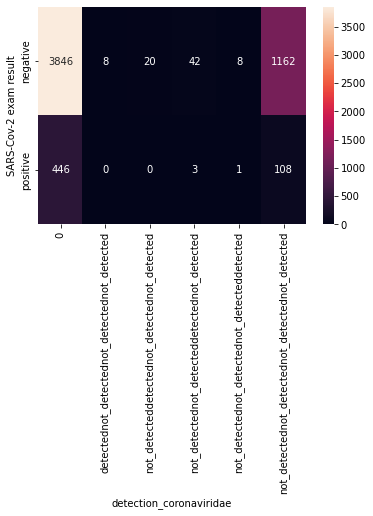

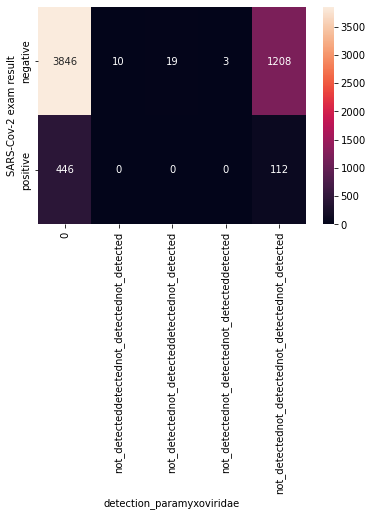

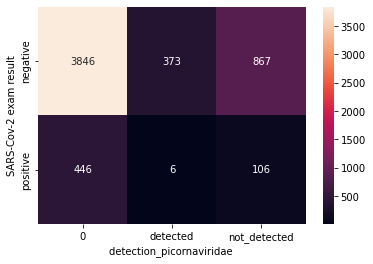

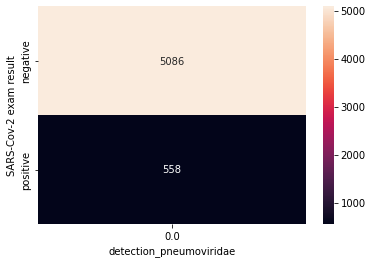

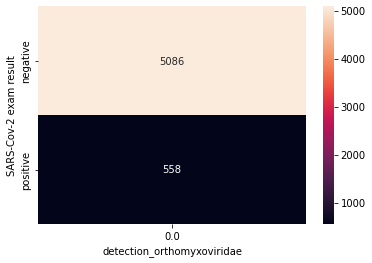

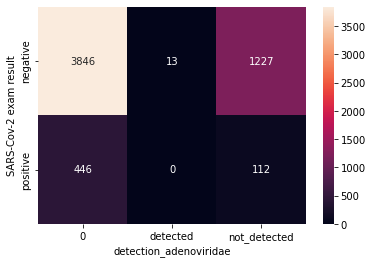

In [46]:
for col in cat_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df_raw['SARS-Cov-2 exam result'],df[col]),annot=True, fmt='d')

**Etude de la correlation**

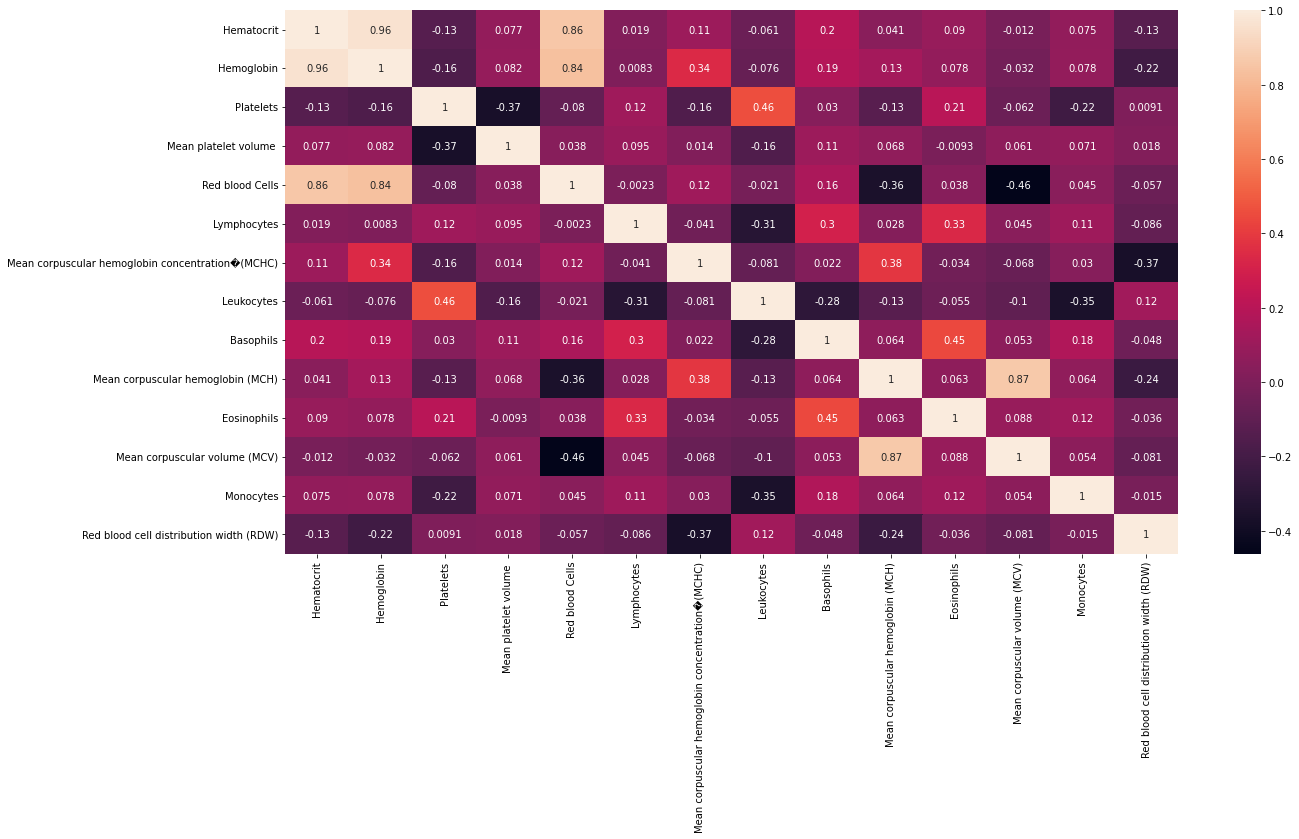

In [47]:
# Correlation calculation df.select_dtypes('float')
spearman_corr = num_columns.corr('spearman')
# Plot
plt.figure(figsize=(20,10))
sns.heatmap(spearman_corr, annot = True);

In [ ]:
handled_df =pd.concat([num_columns, cat_columns], axis=1)
handled_df.head()

# **MODELISATION**